The goal of this project was to predict the outcome if a customer had exited the organization or not ,using an artificial neural network (ANN) model.

The ANN model used in this project consists of 4 layers , 2 of which comprises the hidden layers , with the Input layer and output layer corresponding to the other 2.

From the dataset , The Row number , Customer ID and Surname columns uniquely Identifies each customers , since these columns are not important input features they are dropped from the dataframe leaving only the important features to train the model with.

I initialized the ANN model by importing and calling the Sequential model and then proceeded to creating the layers of the ANN model.

The summary of the ANN model is given in Line 23 , the model was trained for 100 epochs and an accuracy of 86.73% was achieved

With this trained model , We can make predictions on the test set and we can also validate the model using some validation sets.

Date: 30/06/2022.

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
data = pd.read_csv(open('C:\\Users\\user\\Documents\\datasets\\Churn_Modelling.csv'))

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = data.drop(['RowNumber','CustomerId', 'Surname', 'Exited'], axis=1)

In [5]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
Y = data['Exited']

In [7]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
X_encod = pd.get_dummies(X)

In [9]:
X_encod

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X_train ,X_test , Y_train ,Y_test = train_test_split(X_encod , Y ,test_size=0.2 )

In [12]:
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_train

array([[-0.37388374,  1.14078533,  0.33845656, ...,  1.73610172,
        -0.90865306,  0.90865306],
       [ 1.43723003, -0.18429226, -0.69856085, ...,  1.73610172,
         1.10053005, -1.10053005],
       [ 0.36091099,  0.00500453, -0.35288838, ..., -0.57600312,
        -0.90865306,  0.90865306],
       ...,
       [-1.56404421,  0.09965293, -1.38990579, ...,  1.73610172,
        -0.90865306,  0.90865306],
       [-0.74645571,  0.09965293,  1.72114644, ..., -0.57600312,
        -0.90865306,  0.90865306],
       [-2.00906074, -0.08964387,  0.68412903, ..., -0.57600312,
         1.10053005, -1.10053005]])

In [15]:
X_train.shape

(8000, 13)

In [16]:
X_test = scaler.fit_transform(X_test)

importing all the necessary library , for creating any nueral network ,whether ANN , CNN , RNN we need to always import the sequential libraray

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU , PReLU ,ELU
from tensorflow.keras.layers import Dropout

initializing the ANN

In [18]:
classifier = Sequential()

adding the input layer and the first hidden layer

In [19]:
classifier.add(Dense(input_dim = 13 , activation='relu' , units = 6 , kernel_initializer = 'he_uniform'))

adding the second hidden layer

In [20]:
classifier.add(Dense(units = 6 , activation = 'relu' , kernel_initializer = 'he_uniform'))

adding the output layer

In [21]:
classifier.add(Dense(units =1 , activation = 'sigmoid' , kernel_initializer = 'glorot_uniform'))

compiling the ANN

In [22]:
classifier.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


fitting the ANN to the training set

In [24]:
model = classifier.fit(X_train , Y_train ,validation_split=0.33 , batch_size= 10, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.7938 - accuracy: 0.6163 - val_loss: 0.5419 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4997 - accuracy: 0.7968 - val_loss: 0.4704 - val_accuracy: 0.7997
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4566 - accuracy: 0.8024 - val_loss: 0.4473 - val_accuracy: 0.8016
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4355 - accuracy: 0.8035 - val_loss: 0.4301 - val_accuracy: 0.8073
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4187 - accuracy: 0.8100 - val_loss: 0.4150 - val_accuracy: 0.8103
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4054 - accuracy: 0.8166 - val_loss: 0.4012 - val_accuracy: 0.8148
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3932 - accuracy: 0.8203 - val_loss: 0.3889 - val_accuracy: 0.8217

In [25]:
y_pred = classifier.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [26]:
y_pred[1:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [27]:
y_pred = (y_pred>0.5)

In [28]:
Y_test = (Y_test >0.5)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
score = accuracy_score(Y_test , y_pred)

In [31]:
score

0.8605

In [32]:
y_pred[1:20]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

In [35]:
cm = confusion_matrix(Y_test , y_pred, labels = [0,1])

In [36]:
cm

array([[1511,   80],
       [ 199,  210]], dtype=int64)

In [37]:
cd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=  [0,1])

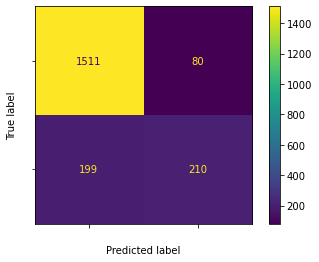

In [38]:
cd.plot()
plt.xticks(color='white');
plt.yticks(color='white');

In [39]:
y_pred[1:20]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])